In [110]:
import numpy as np
import pywt
import cv2    
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [111]:
roi_color = cv2.imread('./data/lionel_messi/lionel_messi1.png')
cropped_img = np.array(roi_color)
cropped_img.shape

(179, 179, 3)

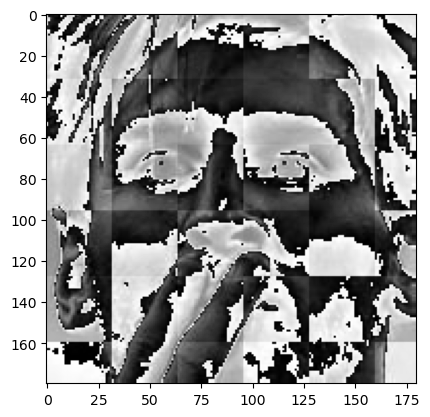

In [112]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [113]:
import os

In [114]:
celebrity_file_names_dict = {}
cropped_image_dirs = {"lionel_messi", "maria_sharapova", "roger_federer", "serena_williams", "virat_kohli"}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir
    file_list = []
    img_dir_path = "./data/" + img_dir
    for entry in os.scandir(img_dir_path):
        file_name = entry.name  # Get the name of the file
        result_string = os.path.join(img_dir_path, file_name)  # Construct the complete path
        print(result_string)
        file_list.append(result_string)
    celebrity_file_names_dict[celebrity_name] = file_list

celebrity_file_names_dict


./data/virat_kohli\virat_kohli1.png
./data/virat_kohli\virat_kohli10.png
./data/virat_kohli\virat_kohli11.png
./data/virat_kohli\virat_kohli12.png
./data/virat_kohli\virat_kohli13.png
./data/virat_kohli\virat_kohli14.png
./data/virat_kohli\virat_kohli15.png
./data/virat_kohli\virat_kohli16.png
./data/virat_kohli\virat_kohli17.png
./data/virat_kohli\virat_kohli18.png
./data/virat_kohli\virat_kohli19.png
./data/virat_kohli\virat_kohli2.png
./data/virat_kohli\virat_kohli20.png
./data/virat_kohli\virat_kohli21.png
./data/virat_kohli\virat_kohli23.png
./data/virat_kohli\virat_kohli25.png
./data/virat_kohli\virat_kohli26.png
./data/virat_kohli\virat_kohli27.png
./data/virat_kohli\virat_kohli28.png
./data/virat_kohli\virat_kohli30.png
./data/virat_kohli\virat_kohli31.png
./data/virat_kohli\virat_kohli32.png
./data/virat_kohli\virat_kohli33.png
./data/virat_kohli\virat_kohli34.png
./data/virat_kohli\virat_kohli35.png
./data/virat_kohli\virat_kohli36.png
./data/virat_kohli\virat_kohli37.png
./d

{'virat_kohli': ['./data/virat_kohli\\virat_kohli1.png',
  './data/virat_kohli\\virat_kohli10.png',
  './data/virat_kohli\\virat_kohli11.png',
  './data/virat_kohli\\virat_kohli12.png',
  './data/virat_kohli\\virat_kohli13.png',
  './data/virat_kohli\\virat_kohli14.png',
  './data/virat_kohli\\virat_kohli15.png',
  './data/virat_kohli\\virat_kohli16.png',
  './data/virat_kohli\\virat_kohli17.png',
  './data/virat_kohli\\virat_kohli18.png',
  './data/virat_kohli\\virat_kohli19.png',
  './data/virat_kohli\\virat_kohli2.png',
  './data/virat_kohli\\virat_kohli20.png',
  './data/virat_kohli\\virat_kohli21.png',
  './data/virat_kohli\\virat_kohli23.png',
  './data/virat_kohli\\virat_kohli25.png',
  './data/virat_kohli\\virat_kohli26.png',
  './data/virat_kohli\\virat_kohli27.png',
  './data/virat_kohli\\virat_kohli28.png',
  './data/virat_kohli\\virat_kohli30.png',
  './data/virat_kohli\\virat_kohli31.png',
  './data/virat_kohli\\virat_kohli32.png',
  './data/virat_kohli\\virat_kohli33.png'

In [115]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'virat_kohli': 0,
 'maria_sharapova': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [116]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [117]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [118]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(168, 4096)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7380952380952381

In [120]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       0.92      1.00      0.96        11
           2       1.00      0.70      0.82        10
           3       0.40      0.40      0.40         5
           4       0.75      0.38      0.50         8

    accuracy                           0.74        42
   macro avg       0.73      0.70      0.68        42
weighted avg       0.78      0.74      0.73        42



In [121]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [122]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [123]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.824923,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.674769,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.880923,{'logisticregression__C': 1}


In [124]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [125]:
best_estimators['svm'].score(X_test,y_test)

0.7380952380952381

In [126]:
best_estimators['random_forest'].score(X_test,y_test)

0.5238095238095238

In [127]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8333333333333334

In [128]:
best_clf = best_estimators['logistic_regression']

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  0,  0],
       [ 0, 10,  0,  1,  0],
       [ 0,  0,  9,  1,  0],
       [ 0,  1,  0,  3,  1],
       [ 0,  0,  0,  3,  5]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

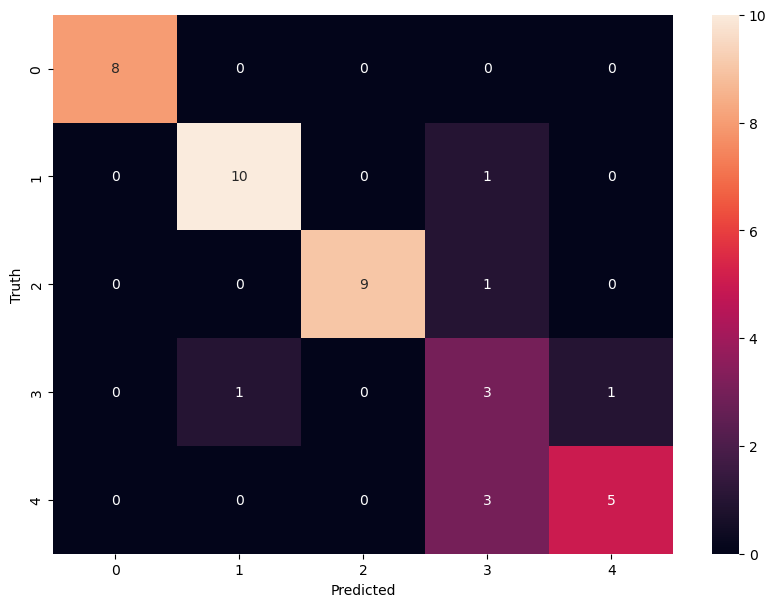

In [130]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [131]:
class_dict

{'virat_kohli': 0,
 'maria_sharapova': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [132]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [133]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))